In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1,2,1]])

import random
for i in range(10):
  x_1 = random.randint(0,3)
  x_2 = random.randint(0,5)
  X = np.asarray([[x_1, x_2, 1]]) # adding bias term at the end for augmented version of X as well
  points = np.append(points, X, axis=0)

print(points)

[[1 2 1]
 [3 5 1]
 [1 5 1]
 [1 2 1]
 [1 4 1]
 [1 2 1]
 [1 0 1]
 [3 4 1]
 [3 2 1]
 [1 5 1]
 [1 4 1]]


In [2]:
w=np.asarray([6,3,-12])

In [3]:
def linClassification(w, points):
  for point in points:
    gx = 0
    for i in range(len(w)):
      gx+=w[i]*point[i]
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

def linClassification_VectorialForm(w, points):
  for point in points:
    gx = np.sum(w*point)
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

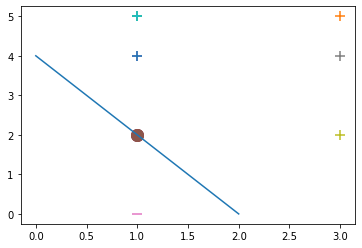

In [4]:
plt.plot([2,0], [0,4])

linClassification(w, points)
plt.show()

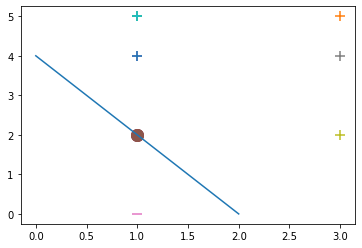

In [5]:
plt.plot([2,0], [0,4])

linClassification_VectorialForm(w, points)
plt.show()

In [6]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1, -1, 1, 1, 1])

In [7]:
def perceptron_algo(X,Y):
  w=np.zeros(len(X[0]))
  eta=1
  epochs=10

  for epoch in range(epochs):
    for i,x in enumerate(X):
      if(np.dot(X[i],w)*Y[i]) <=0:
        w = w + eta * X[i] *Y[i]
  return w

In [12]:
def perceptron_algo_plot(X, Y):
    
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []
    misclassified_points = []
    avg_error = []

    for t in range(n):
        total_error = 0
        number = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                number += 1
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        misclassified_points.append(number)
        if number==0:
          avg_error.append(number)
        else:
          avg_error.append((total_error * -1)/number)

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(errors, label ='Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(avg_error, label ='Average Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

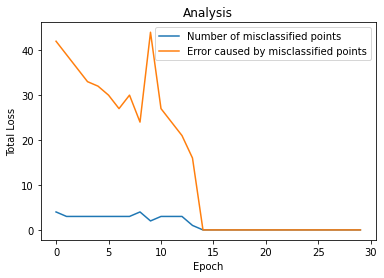

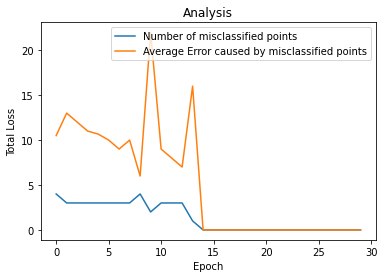

In [14]:
w=perceptron_algo_plot(X,y)

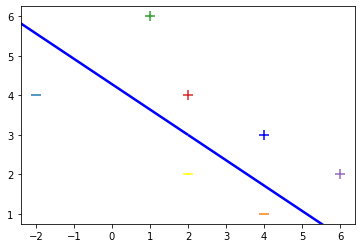

In [15]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

In [16]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [17]:
y = np.array([-1, -1, 1, -1, -1])

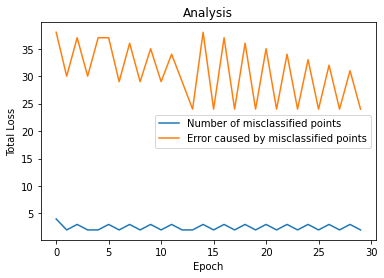

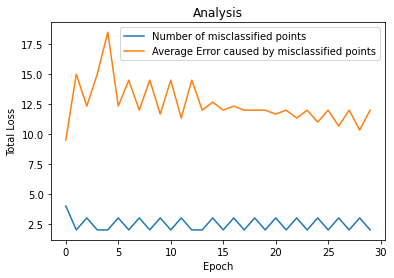

[-2.  3. 15.]


In [18]:
print(perceptron_algo_plot(X, y))